## Variable transformation:

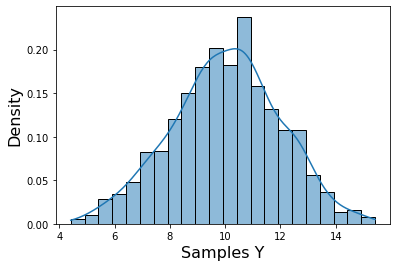

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
from scipy.stats import norm
from scipy import stats
from scipy.stats import gamma

norm1 = norm(10, 2).rvs(1000) 
ax = sns.histplot(norm1, kde=True, stat='density') 
plt.xlabel("Samples Y", fontsize=16) 
plt.ylabel("Density", fontsize=16) 
plt.show()

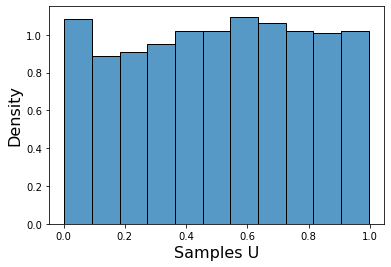

In [2]:
u1 = stats.norm.cdf(norm1, 10, 2) 
ax = sns.histplot(u1, stat='density') 
plt.xlabel("Samples U", fontsize=16) 
plt.ylabel("Density", fontsize=16) 
plt.show()

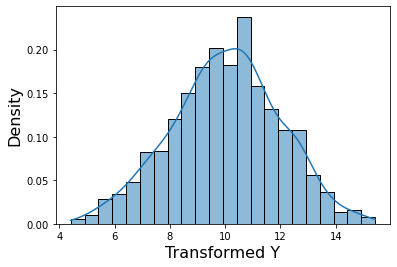

In [3]:
norm2 = stats.norm.ppf(u1,10, 2) 
ax = sns.histplot(norm2, kde=True, stat='density') 
plt.xlabel("Transformed Y", fontsize=16) 
plt.ylabel("Density", fontsize=16) 
plt.show()

## Gaussian copula

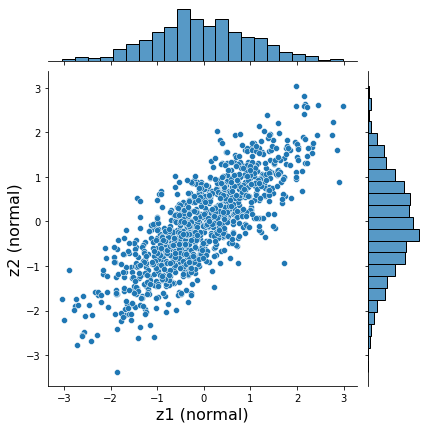

In [4]:
ro = 0.8
z1, z2 = np.random.multivariate_normal([0, 0], np.array([[1, ro], [ro, 1]]), 1000).T
df_normal=pd.DataFrame({'z1':z1, 'z2':z2}) 
h = sns.jointplot(x='z1', y='z2', data=df_normal)
h.set_axis_labels('z1 (normal)', 'z2 (normal)', fontsize=16)
plt.savefig("Grafz.pdf", bbox_inches = "tight")
plt.show()

In [8]:
from scipy import stats
# res = stats.spearmanr(z1, z2)
res = stats.spearmanr(y1, y2)
res.correlation

In [11]:
# res_z = stats.spearmanr(z1, z2)
# res_u = stats.spearmanr(u1, u2)
# res_y = stats.spearmanr(y1, y2)
# print(res_z.correlation, res_u.correlation, res_y.correlation)

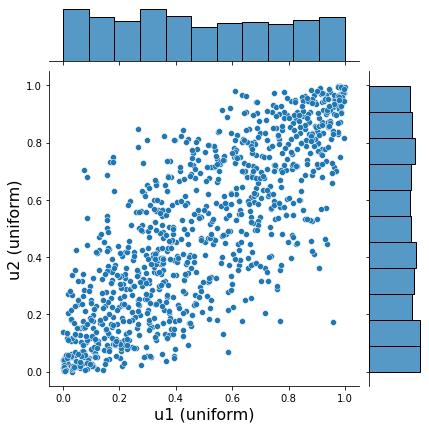

In [9]:
u1 = norm.cdf(z1) 
u2 = norm.cdf(z2)
df_uniform=pd.DataFrame({'u1':u1, 'u2':u2}) 
h = sns.jointplot(x='u1', y='u2', data=df_uniform)
h.set_axis_labels('u1 (uniform)', 'u2 (uniform)', fontsize=16)
plt.savefig("Grafu.pdf", bbox_inches = "tight")
plt.show()

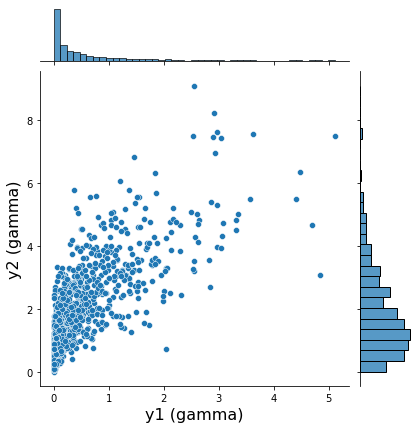

In [10]:
y1 = gamma.ppf(u1, a=0.5) 
y2 = gamma.ppf(u2, a=2) 
df_gamma=pd.DataFrame({'y1':y1, 'y2':y2}) 
h = sns.jointplot(x='y1', y='y2', data=df_gamma)
h.set_axis_labels('y1 (gamma)', 'y2 (gamma)', fontsize=16)
plt.savefig("Grafy.pdf", bbox_inches = "tight")
plt.show()

## Financial application:

In [172]:
df = pd.read_csv("Copula_Financial_Data.csv")
df = df.drop("Date", axis=1)

In [174]:
from copulas.multivariate import GaussianMultivariate
from copulas.univariate import ParametricType, Univariate
from copulas.univariate import BetaUnivariate, GaussianKDE, GaussianUnivariate

univariate = Univariate(parametric=ParametricType.PARAMETRIC)
copula = GaussianMultivariate(distribution=univariate)
copula.fit(df)

synthetic_data = copula.sample(1000)
copula.to_dict()["univariates"]

/Users/tbauman/miniforge3/envs/ds_env/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:647: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/tbauman/miniforge3/envs/ds_env/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:5350: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/tbauman/miniforge3/envs/ds_env/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2640: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/tbauman/miniforge3/envs/ds_env/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/tbauman/miniforge3/envs/ds_env/lib/python3.8/site-packages/copulas/univariate/truncated_gaussian.py:45: RuntimeWarning: invali

[{'a': 3.390794175491938,
  'loc': 2.8413565700023504,
  'scale': 0.9613904334210869,
  'type': 'copulas.univariate.gamma.GammaUnivariate'},
 {'a': 2.2153727752557226,
  'loc': 0.587667799113925,
  'scale': 1.6807847634497117,
  'type': 'copulas.univariate.gamma.GammaUnivariate'},
 {'df': 4.418636016053262,
  'loc': 0.007793057540584951,
  'scale': 0.027364404615382733,
  'type': 'copulas.univariate.student_t.StudentTUnivariate'},
 {'df': 5.569986055956996,
  'loc': 0.0017889180113481746,
  'scale': 0.01684999082323741,
  'type': 'copulas.univariate.student_t.StudentTUnivariate'}]

In [175]:
synthetic_data.corr()

,Unemployment Rate,Sticky Price CPI,S&P Returns,10 Year Bond Returns
Unemployment Rate,1.000000,0.059552,0.131283,0.035854
Sticky Price CPI,0.059552,1.000000,-0.128184,-0.012311
S&P Returns,0.131283,-0.128184,1.000000,0.105037
10 Year Bond Returns,0.035854,-0.012311,0.105037,1.000000


In [176]:
df.corr()

,Unemployment Rate,Sticky Price CPI,S&P Returns,10 Year Bond Returns
Unemployment Rate,1.000000,0.150640,0.149276,0.100035
Sticky Price CPI,0.150640,1.000000,-0.064634,-0.061921
S&P Returns,0.149276,-0.064634,1.000000,0.102222
10 Year Bond Returns,0.100035,-0.061921,0.102222,1.000000


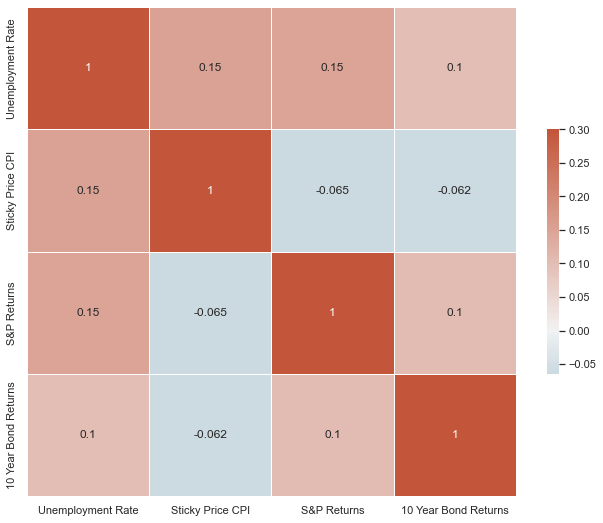

In [177]:
sns.set_theme(style="white")

corr = df.corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
#plt.savefig("corr1.pdf", bbox_inches = "tight")
plt.show()

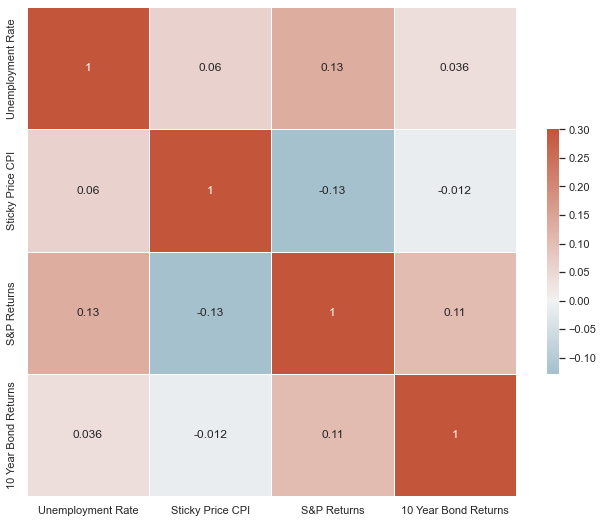

In [178]:
sns.set_theme(style="white")
corr = synthetic_data.corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
#plt.savefig("corr2.pdf", bbox_inches = "tight")
plt.show()